In [1]:
#API Authentication

#conda install -c conda-forge tweepy

#The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it
#your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you
#wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass
#these credentials to tweepy's OAuth handler.

# Import package
import tweepy, json

# Store OAuth authentication credentials in relevant variables
access_token = "2675308394-nLfNe1XIQqdrw2ty4PYNEhlrkOCO9v2uJFKqekp"
access_token_secret = "FzruQdOdPri10jmvUEzDUfS9CvfqLEHzo81vEfwbd8R7b"
consumer_key = "B7H4opN2GeVNvBF7nhQVgVgeg"
consumer_secret = "GTlqAbVLJbTSHZp2GJb56yOjJCmvzNeoPYtPXjxSC7wRsBa5p3"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [2]:
#Streaming tweets

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("datasets/tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

#Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet
#stream listener class, MyStreamListener, just as Hugo did in the introductory video. You can find the code for the tweet stream
#listener class here.

#Your task is to create the Streamobject and to filter tweets according to particular keywords.

# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

In [3]:
#Load and explore your Twitter data

#Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the
#next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

#Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other
#offensive content (in this exercise, and any following exercises that also use real Twitter data).

# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'datasets/tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [4]:
#Twitter data to DataFrame

#Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet.
#Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text'];
#similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns
#are 'text' and 'lang'.

# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @MattGertz: Donald Trump has published seve...   en
1                             @MebFaber Donald Trump   en
2  RT @NourHadidi: If you and Ted Cruz have the s...   en
3  RT @ACTforAmerica: Trump and Kushner created P...   en
4  RT @ruthbenghiat: We were likely closer to the...   en


In [5]:
#A little bit of Twitter text analysis

#Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain
#the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function
#word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

#You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of
#objects for each candidate has been initialized to 0.

# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

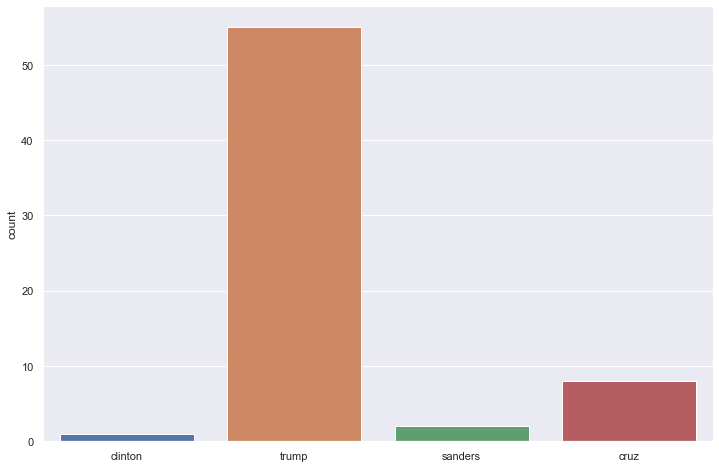

In [6]:
#Plotting your Twitter data

#Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use
#the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll
#first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:

#1. a list of labels and
#2. a list containing the variables you wish to plot (clinton, trump and so on.)

#Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your
#environment.

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()